COMPREHENSIVE FEATURE SELECTION ANALYSIS
Early Sexual Debut Risk Factors - Rwanda DHS 2019-20

✓ Data loaded: 14,530 observations, 93 variables
✓ Sexually active women: 10,486
✓ Early sexual debut cases: 2656 (25.3%)

STEP 1: CATEGORIZING POTENTIAL PREDICTORS

📊 POTENTIAL PREDICTOR CATEGORIES:

1. Demographic variables: 4
   - v012
   - v024
   - v025
   - v102

2. Socioeconomic variables: 7
   - v106
   - v107
   - v133
   - v149
   - v190
   - v191
   - v190a

3. Household assets: 10
   - v113
   - v115
   - v116
   - v119
   - v120
   - v121
   - v122
   - v127
   - v128
   - v129

4. Media exposure: 3
   - v157
   - v158
   - v159

5. HIV/AIDS knowledge: 2
   - v754cp
   - v754dp

6. Cultural factors: 2
   - v130
   - v131

✓ Variables available in dataset: 28/28

STEP 2: UNIVARIATE STATISTICAL TESTS
Testing each predictor's association with early sexual debut

✓ Univariate tests completed for 27 variables

 SIGNIFICANT PREDICTORS (p < 0.05):

Found 21 significant predictors:

Vari

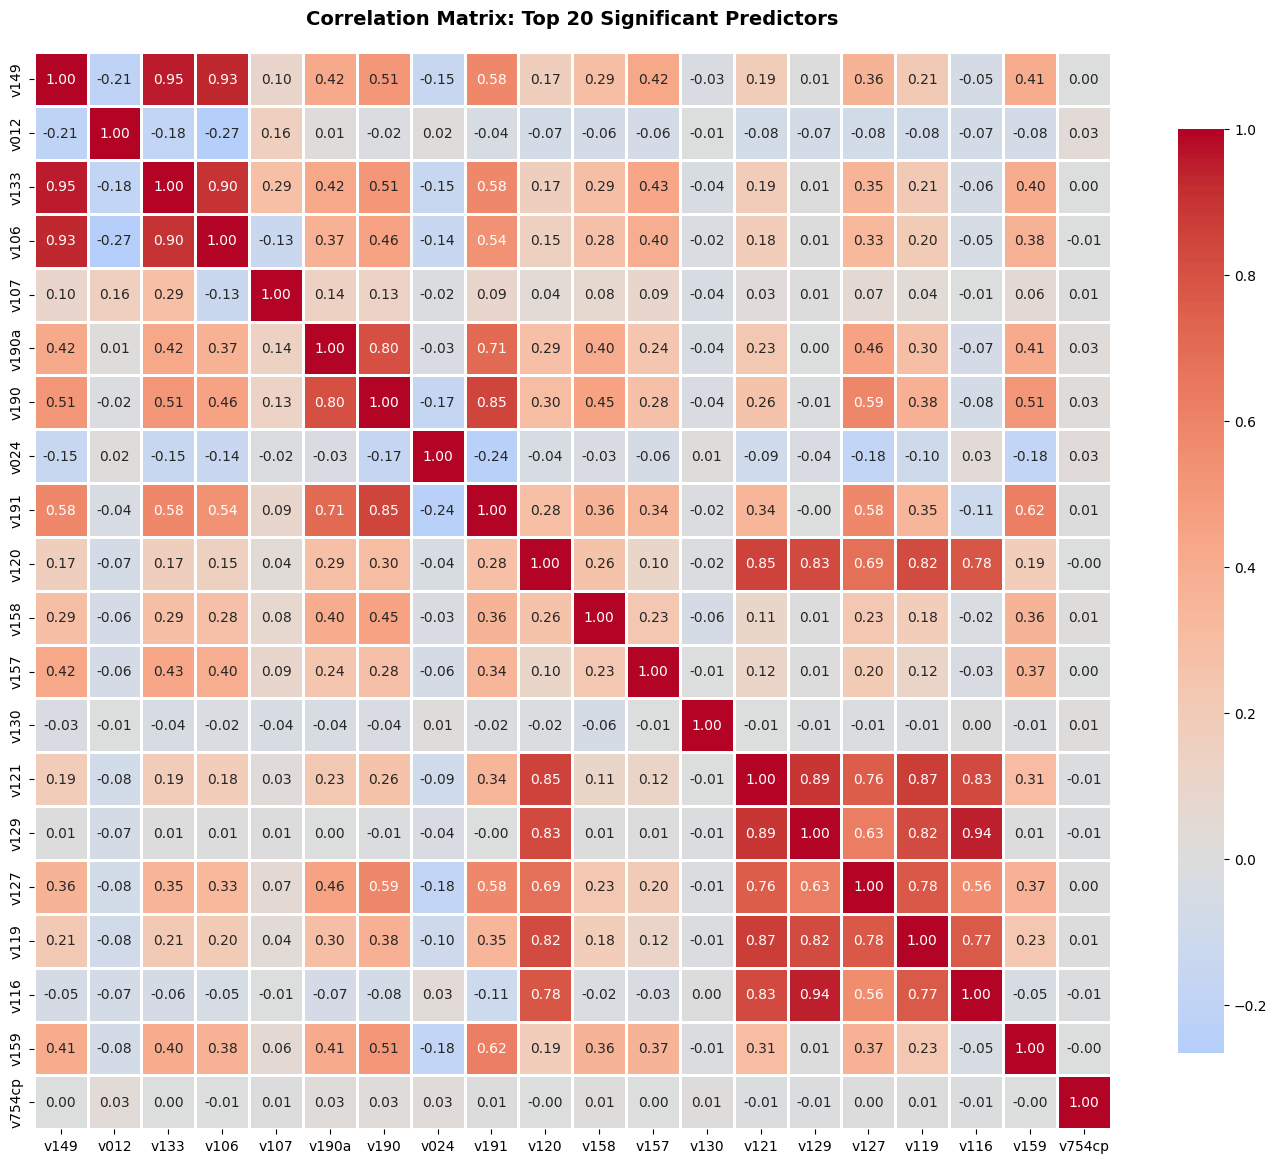


✓ Saved: Feature_Selection_Correlation_Matrix.png

STEP 4: MUTUAL INFORMATION ANALYSIS
Measuring how much information each feature provides about the outcome
  Removed 1 constant variables

📊 TOP 20 FEATURES BY MUTUAL INFORMATION:
Variable  MI_Score
    v012  0.050824
    v149  0.019213
    v133  0.015121
    v024  0.008181
    v106  0.007761
    v191  0.006034
    v157  0.005572
    v102  0.005012
    v120  0.004683
    v158  0.004563
    v128  0.003892
    v121  0.003523
    v115  0.003393
    v129  0.003298
    v122  0.003248
    v130  0.002679
   v190a  0.001799
    v119  0.001603
    v025  0.001238
    v190  0.000843


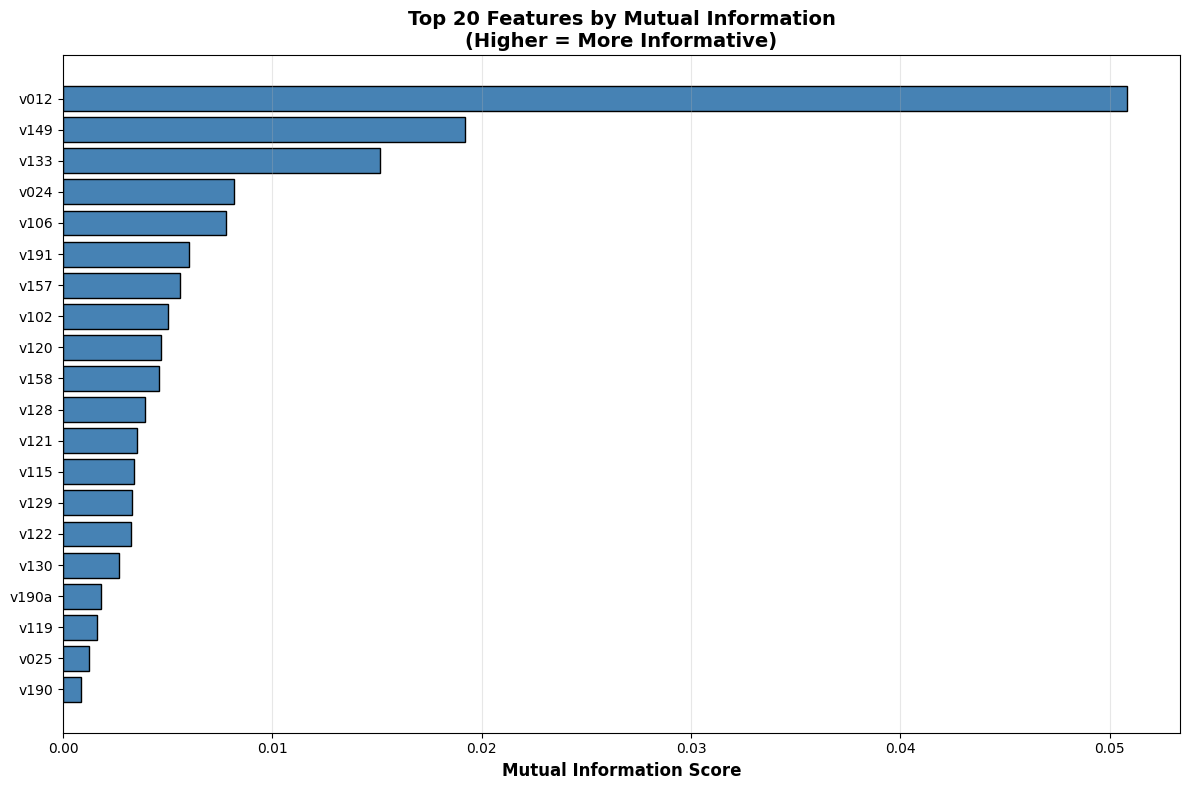


✓ Saved: Feature_Selection_Mutual_Information.png

STEP 5: RANDOM FOREST FEATURE IMPORTANCE
Using tree-based model to identify important predictors

Training Random Forest model...

📊 TOP 20 FEATURES BY RANDOM FOREST IMPORTANCE:
Variable  Importance
    v012    0.379348
    v133    0.087098
    v149    0.080511
    v191    0.080057
    v106    0.040414
    v115    0.035520
    v024    0.029661
    v113    0.027822
    v107    0.027729
    v116    0.024934
   v190a    0.024340
    v129    0.022436
    v128    0.020164
    v130    0.019396
    v190    0.013936
    v157    0.011571
    v158    0.010813
    v159    0.010505
    v025    0.007624
    v102    0.007525


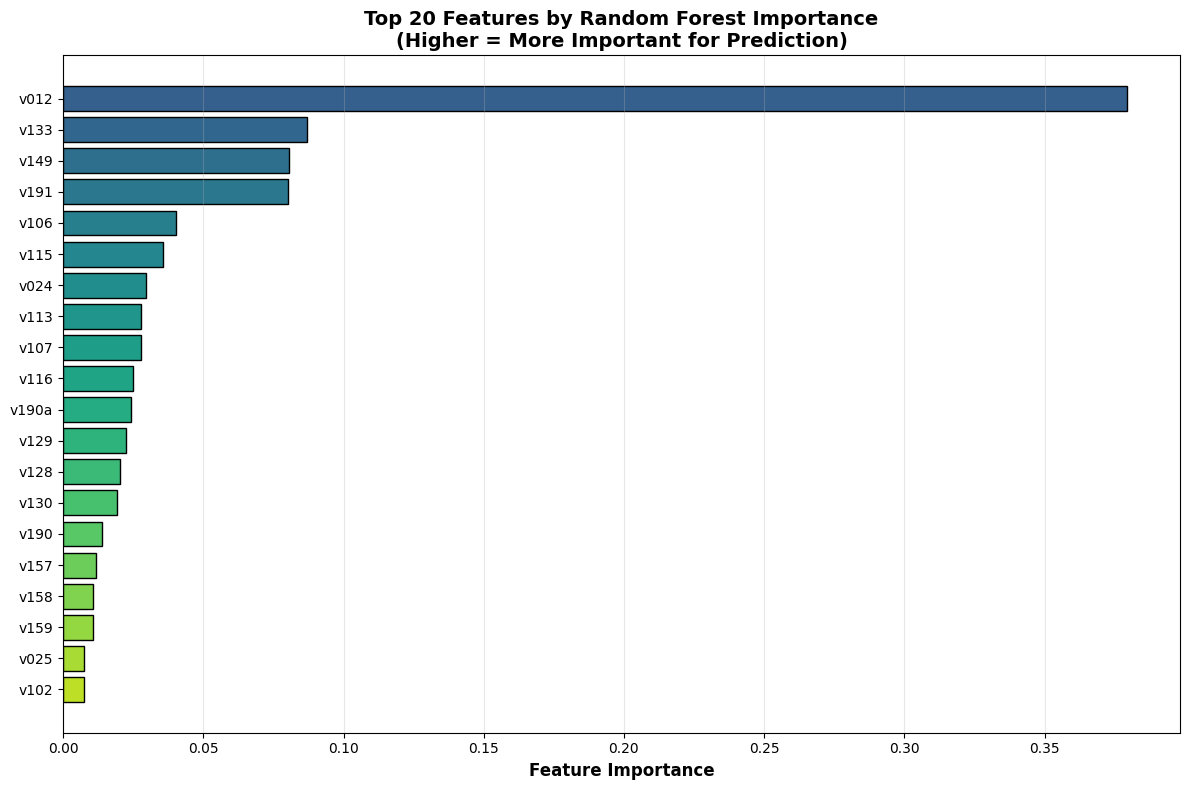


✓ Saved: Feature_Selection_Random_Forest.png

STEP 6: RECURSIVE FEATURE ELIMINATION (RFE)
Iteratively removing least important features

Running RFE to select top 20 features...

📊 TOP 20 FEATURES SELECTED BY RFE:
Variable  Ranking
    v012        1
    v024        1
    v025        1
    v102        1
    v107        1
    v133        1
    v149        1
    v190        1
    v119        1
   v190a        1
    v113        1
    v120        1
    v129        1
    v127        1
    v122        1
    v121        1
    v159        1
    v158        1
  v754dp        1
  v754cp        1

STEP 7: LASSO REGULARIZATION (L1)
Using regularization to identify most predictive features

📊 FEATURES SELECTED BY LASSO (Non-zero coefficients):
   Optimal alpha: 0.0006
   Features selected: 23/27

Top features:
Variable  Coefficient
    v012    -0.071655
    v133    -0.056898
    v129    -0.043901
    v122     0.034127
    v149    -0.026748
    v190    -0.020078
    v024     0.018484
    v025    -0.

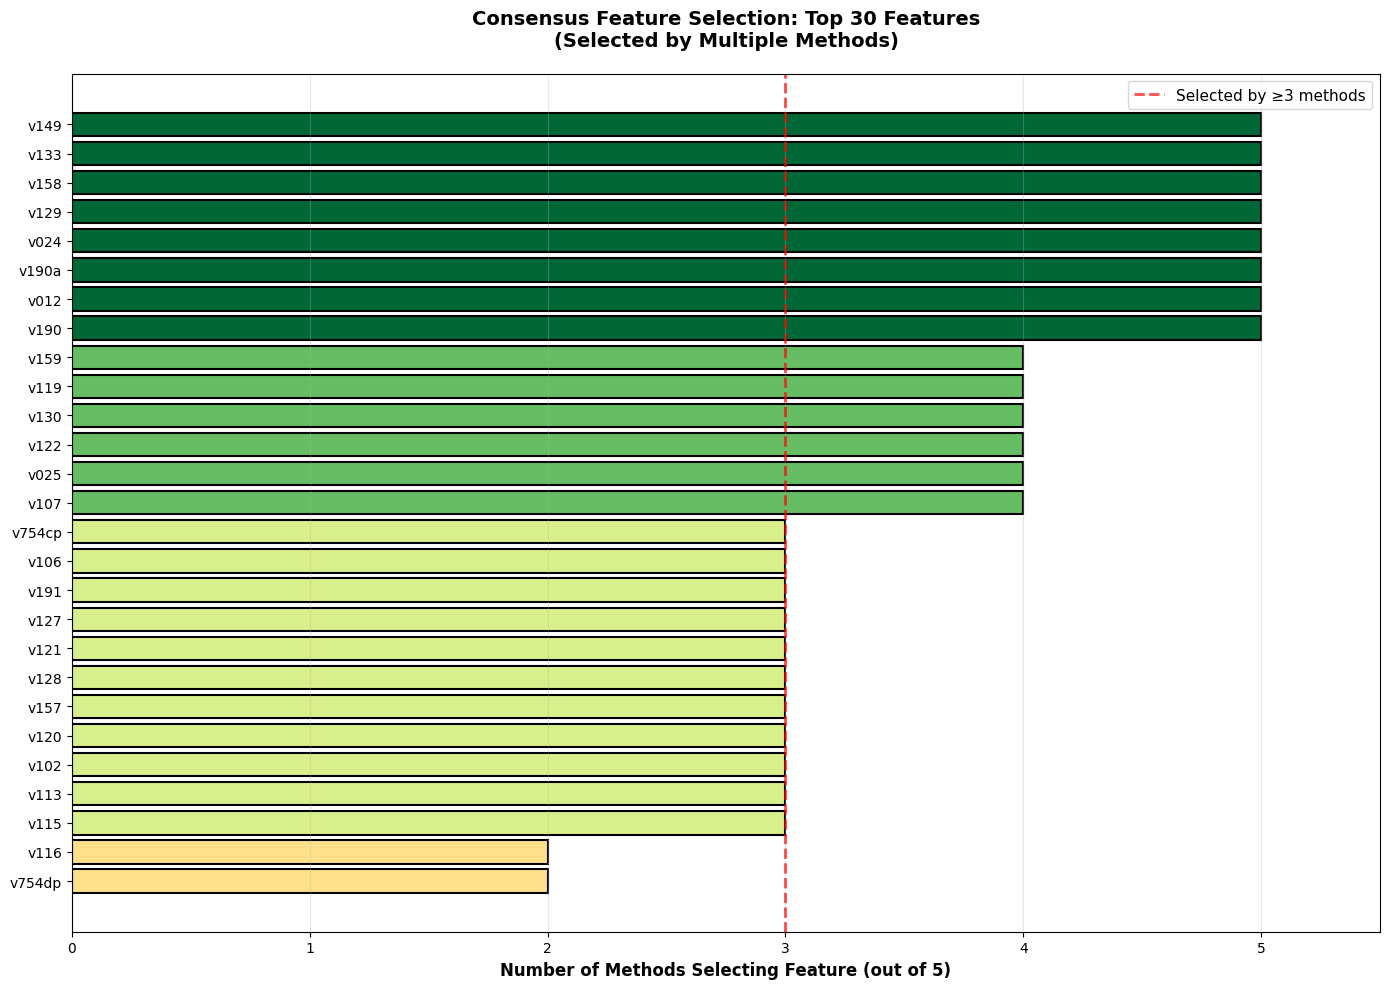


✓ Saved: Feature_Selection_Consensus.png
✓ Saved: Feature_Selection_Consensus_Ranking.csv

STEP 9: FINAL FEATURE RECOMMENDATIONS

✅ STRONGLY RECOMMENDED FEATURES (Selected by ≥3 methods):
   Total: 25 features


Demographic:
  ✓ v024 (selected by 5/5 methods)
  ✓ v012 (selected by 5/5 methods)
  ✓ v025 (selected by 4/5 methods)
  ✓ v102 (selected by 3/5 methods)

Socioeconomic:
  ✓ v149 (selected by 5/5 methods)
  ✓ v133 (selected by 5/5 methods)
  ✓ v190a (selected by 5/5 methods)
  ✓ v190 (selected by 5/5 methods)
  ✓ v107 (selected by 4/5 methods)
  ✓ v106 (selected by 3/5 methods)
  ✓ v191 (selected by 3/5 methods)

Household:
  ✓ v129 (selected by 5/5 methods)
  ✓ v119 (selected by 4/5 methods)
  ✓ v122 (selected by 4/5 methods)
  ✓ v127 (selected by 3/5 methods)
  ✓ v121 (selected by 3/5 methods)
  ✓ v128 (selected by 3/5 methods)
  ✓ v120 (selected by 3/5 methods)
  ✓ v113 (selected by 3/5 methods)
  ✓ v115 (selected by 3/5 methods)

Media:
  ✓ v158 (selected by 5/5 methods)
  

In [ ]:
"""
COMPREHENSIVE FEATURE SELECTION ANALYSIS
==========================================
Early Sexual Debut Risk Factors - Rwanda DHS 2019-20

This script performs rigorous feature selection using multiple methods:
1. Univariate statistical tests
2. Correlation/Multicollinearity analysis
3. Mutual Information
4. Tree-based feature importance
5. Recursive Feature Elimination (RFE)
6. LASSO regularization
7. Variance Inflation Factor (VIF)

Goal: Identify the most important predictors for early sexual debut
"""

# %% [markdown]
# # Comprehensive Feature Selection Analysis
# ## Early Sexual Debut Risk Factors - Rwanda DHS 2019-20

# %% [markdown]
# ### Setup: Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter
%matplotlib inline

print("="*80)
print("COMPREHENSIVE FEATURE SELECTION ANALYSIS")
print("Early Sexual Debut Risk Factors - Rwanda DHS 2019-20")
print("="*80)

# Load data
data = pd.read_csv('rwanda_dhs_CLEANED_minimal.csv')
print(f"\n✓ Data loaded: {len(data):,} observations, {data.shape[1]} variables")

# Focus on sexually active women only (outcome is only defined for them)
has_sex = (data['v525'] > 0) & (data['v525'] < 50)
data_analysis = data[has_sex].copy()
print(f"✓ Sexually active women: {len(data_analysis):,}")
print(f"✓ Early sexual debut cases: {data_analysis['early_sexual_debut'].sum():.0f} ({data_analysis['early_sexual_debut'].mean()*100:.1f}%)")

# %% [markdown]
# ### Step 1: Categorizing Potential Predictors
# 
# **CRITICAL DECISION:** We only include variables that existed **BEFORE** sexual debut to avoid reverse causation.
# 
# **Excluded variables:**
# - Marital status (happened after)
# - Employment (measured currently)  
# - Number of children (after debut)
# - Contraception use (after debut)
# 
# **Included variables:**
# - Education (predetermined by family)
# - Wealth (family background)
# - Household assets (predetermined)

# ============================================================================
# STEP 1: IDENTIFY ALL POTENTIAL PREDICTORS
# ============================================================================

print("\n" + "="*80)
print("STEP 1: CATEGORIZING POTENTIAL PREDICTORS")
print("="*80)

# IMPORTANT: Only include variables that existed BEFORE sexual debut
# Exclude post-treatment variables (things that happen after debut)

# Demographic characteristics (predetermined/fixed)
demographic_vars = [
    'v012',     # Current age (proxy for cohort)
    'v024',     # Region/Province
    'v025',     # Urban/rural (residence type)
    'v102',     # Type of place of residence
]

# Socioeconomic status (usually predetermined by family)
socioeconomic_vars = [
    'v106',     # Education level
    'v107',     # Highest year of education
    'v133',     # Education in single years
    'v149',     # Educational attainment
    'v190',     # Wealth index
    'v191',     # Wealth index factor score
    'v190a',    # Wealth index urban/rural
]

# Household characteristics (predetermined by family)
household_vars = [
    'v113',     # Has electricity
    'v115',     # Has television
    'v116',     # Has radio
    'v119',     # Has telephone
    'v120',     # Has bicycle
    'v121',     # Has motorcycle
    'v122',     # Has car/truck
    'v127',     # Floor material
    'v128',     # Wall material
    'v129',     # Roof material
]

# Media exposure (could influence behavior)
media_vars = [
    'v157',     # Reads newspaper
    'v158',     # Listens to radio
    'v159',     # Watches TV
]

# HIV/AIDS knowledge (could influence behavior)
knowledge_vars = [
    'v754cp',   # Know limiting partners prevents AIDS
    'v754dp',   # Know abstaining prevents AIDS
]

# Cultural/Social factors
cultural_vars = [
    'v130',     # Religion
    'v131',     # Ethnicity
]

# EXCLUDE these variables (POST-DEBUT or outcome-related):
# - v501 (current marital status) - likely AFTER debut
# - v511 (age at first union) - AFTER debut
# - v201, v218 (children) - AFTER debut
# - v213 (currently pregnant) - AFTER debut
# - v531 (age at first birth) - AFTER debut
# - v301, v302, v312 (contraception) - likely AFTER debut
# - v714, v715 (employment) - could be after
# - v743a-d, v744a-e (autonomy/attitudes) - measured currently, not pre-debut

print("\n📊 POTENTIAL PREDICTOR CATEGORIES:")
print(f"\n1. Demographic variables: {len(demographic_vars)}")
for var in demographic_vars:
    print(f"   - {var}")

print(f"\n2. Socioeconomic variables: {len(socioeconomic_vars)}")
for var in socioeconomic_vars:
    print(f"   - {var}")

print(f"\n3. Household assets: {len(household_vars)}")
for var in household_vars:
    print(f"   - {var}")

print(f"\n4. Media exposure: {len(media_vars)}")
for var in media_vars:
    print(f"   - {var}")

print(f"\n5. HIV/AIDS knowledge: {len(knowledge_vars)}")
for var in knowledge_vars:
    print(f"   - {var}")

print(f"\n6. Cultural factors: {len(cultural_vars)}")
for var in cultural_vars:
    print(f"   - {var}")

all_potential_vars = (demographic_vars + socioeconomic_vars + household_vars + 
                      media_vars + knowledge_vars + cultural_vars)

# Check which variables exist in dataset
existing_vars = [var for var in all_potential_vars if var in data_analysis.columns]
missing_vars = [var for var in all_potential_vars if var not in data_analysis.columns]

print(f"\n✓ Variables available in dataset: {len(existing_vars)}/{len(all_potential_vars)}")
if missing_vars:
    print(f"⚠️  Missing variables: {missing_vars}")

# ============================================================================
# STEP 2: UNIVARIATE STATISTICAL TESTS
# ============================================================================

# %% [markdown]
# ### Step 2: Univariate Statistical Tests
# 
# Testing each predictor individually to see its association with early sexual debut:
# - **Categorical variables:** Chi-square test
# - **Continuous variables:** Independent t-test
# - **Effect size:** Cramér's V (categorical) or Cohen's d (continuous)

# %%
print("\n" + "="*80)
print("STEP 2: UNIVARIATE STATISTICAL TESTS")
print("="*80)
print("Testing each predictor's association with early sexual debut")

univariate_results = []

for var in existing_vars:
    try:
        # Get non-missing data
        var_data = data_analysis[[var, 'early_sexual_debut']].dropna()
        
        if len(var_data) < 30:  # Skip if too few observations
            continue
        
        # Determine if variable is categorical or continuous
        n_unique = var_data[var].nunique()
        
        if n_unique <= 10:  # Categorical
            # Chi-square test
            contingency = pd.crosstab(var_data[var], var_data['early_sexual_debut'])
            chi2, p_value, dof, expected = chi2_contingency(contingency)
            test_stat = chi2
            test_type = 'Chi-square'
            
        else:  # Continuous
            # T-test
            early_group = var_data[var_data['early_sexual_debut'] == 1][var]
            normal_group = var_data[var_data['early_sexual_debut'] == 0][var]
            test_stat, p_value = stats.ttest_ind(early_group, normal_group)
            test_type = 't-test'
        
        # Calculate effect size (Cramér's V for categorical, Cohen's d for continuous)
        if n_unique <= 10:
            n = len(var_data)
            cramer_v = np.sqrt(chi2 / (n * (min(n_unique, 2) - 1)))
            effect_size = cramer_v
        else:
            early_mean = var_data[var_data['early_sexual_debut'] == 1][var].mean()
            normal_mean = var_data[var_data['early_sexual_debut'] == 0][var].mean()
            pooled_std = np.sqrt((var_data[var_data['early_sexual_debut'] == 1][var].var() + 
                                  var_data[var_data['early_sexual_debut'] == 0][var].var()) / 2)
            effect_size = abs(early_mean - normal_mean) / pooled_std if pooled_std > 0 else 0
        
        univariate_results.append({
            'Variable': var,
            'Test': test_type,
            'Test_Statistic': test_stat,
            'P_value': p_value,
            'Effect_Size': effect_size,
            'N_observations': len(var_data),
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })
        
    except Exception as e:
        print(f"    Error testing {var}: {str(e)}")
        continue

# Create DataFrame and sort by p-value
univariate_df = pd.DataFrame(univariate_results)
univariate_df = univariate_df.sort_values('P_value')

print(f"\n✓ Univariate tests completed for {len(univariate_df)} variables")
print(f"\n SIGNIFICANT PREDICTORS (p < 0.05):")
significant_vars = univariate_df[univariate_df['P_value'] < 0.05]
print(f"\nFound {len(significant_vars)} significant predictors:\n")
print(significant_vars[['Variable', 'Test', 'P_value', 'Effect_Size', 'Significant']].to_string(index=False))

# Save results
univariate_df.to_csv('Feature_Selection_Univariate_Tests.csv', index=False)
print("\n✓ Saved: Feature_Selection_Univariate_Tests.csv")

# ============================================================================
# STEP 3: CORRELATION AND MULTICOLLINEARITY ANALYSIS
# ============================================================================

# %% [markdown]
# ### Step 3: Correlation & Multicollinearity Analysis
# 
# Checking for redundant variables:
# - **Correlation matrix:** Identify highly correlated pairs (|r| > 0.8)
# - **Variance Inflation Factor (VIF):** Detect multicollinearity (VIF > 10 is problematic)
# 
# **Why this matters:** Highly correlated predictors cause instability in regression models.

# %%
print("\n" + "="*80)
print("STEP 3: CORRELATION & MULTICOLLINEARITY ANALYSIS")
print("="*80)

# Select numeric variables only
numeric_vars = [var for var in existing_vars if data_analysis[var].dtype in ['int64', 'float64']]
print(f"\nAnalyzing {len(numeric_vars)} numeric variables for multicollinearity")

# Create correlation matrix
X_numeric = data_analysis[numeric_vars].copy()

# Remove constant columns before imputation
non_constant_cols = []
for col in X_numeric.columns:
    if X_numeric[col].nunique() > 1:
        non_constant_cols.append(col)

X_numeric = X_numeric[non_constant_cols]
print(f"  Removed {len(numeric_vars) - len(non_constant_cols)} constant variables")

# Impute missing values for correlation analysis
imputer = SimpleImputer(strategy='median')
X_numeric_imputed = pd.DataFrame(
    imputer.fit_transform(X_numeric),
    columns=X_numeric.columns,
    index=X_numeric.index
)

correlation_matrix = X_numeric_imputed.corr()

# Find highly correlated pairs (|r| > 0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

print(f"\n📊 HIGHLY CORRELATED PAIRS (|r| > 0.8):")
if high_corr_pairs:
    corr_df = pd.DataFrame(high_corr_pairs)
    print(corr_df.to_string(index=False))
    print(f"\n⚠️  Found {len(high_corr_pairs)} highly correlated pairs")
    print("   → Need to remove redundant variables to avoid multicollinearity")
else:
    print("   ✓ No severe multicollinearity detected")

# Variance Inflation Factor (VIF) for remaining concerns
print(f"\n📊 VARIANCE INFLATION FACTOR (VIF) ANALYSIS:")
print("   (VIF > 10 indicates severe multicollinearity)")

# Select a subset for VIF (too many variables makes it slow)
vif_vars = significant_vars['Variable'].head(15).tolist()
vif_vars = [v for v in vif_vars if v in non_constant_cols]  # Use non-constant cols

if len(vif_vars) > 1:
    try:
        X_vif = X_numeric_imputed[vif_vars].copy()
        
        vif_data = []
        for i, var in enumerate(X_vif.columns):
            try:
                vif = variance_inflation_factor(X_vif.values, i)
                if not np.isinf(vif) and not np.isnan(vif):
                    vif_data.append({'Variable': var, 'VIF': vif})
            except:
                continue
        
        if vif_data:
            vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)
            print(vif_df.to_string(index=False))
            
            high_vif = vif_df[vif_df['VIF'] > 10]
            if len(high_vif) > 0:
                print(f"\n⚠️  {len(high_vif)} variables with VIF > 10 (severe multicollinearity)")
                print("   Consider removing these or combining them")
            else:
                print("\n✓ No severe multicollinearity in top predictors")
        else:
            print("   ⚠️  Could not compute VIF (numerical issues)")
    except Exception as e:
        print(f"   ⚠️  VIF analysis skipped due to numerical issues")
else:
    print("   ⚠️  Not enough variables for VIF analysis")

# Create correlation heatmap
plt.figure(figsize=(14, 12))
# Use top 20 significant variables for readability
top_vars = significant_vars['Variable'].head(20).tolist()
top_vars = [v for v in top_vars if v in non_constant_cols]  # Use non-constant cols

if len(top_vars) > 1:
    corr_subset = X_numeric_imputed[top_vars].corr()
    
    sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 20 Significant Predictors', 
              fontsize=14, weight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('Feature_Selection_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in Jupyter
    print("\n✓ Saved: Feature_Selection_Correlation_Matrix.png")
else:
    print("\n⚠️  Not enough variables for correlation heatmap")
    plt.close()

# %% [markdown]
# ### Step 4: Mutual Information Analysis

# ============================================================================
# STEP 4: MUTUAL INFORMATION SCORES
# ============================================================================

print("\n" + "="*80)
print("STEP 4: MUTUAL INFORMATION ANALYSIS")
print("="*80)
print("Measuring how much information each feature provides about the outcome")

# Prepare data
X_mi = data_analysis[existing_vars].copy()
y_mi = data_analysis['early_sexual_debut'].copy()

# Remove rows with missing outcome
valid_idx = y_mi.notna()
X_mi = X_mi[valid_idx]
y_mi = y_mi[valid_idx]

# Remove constant columns first
non_constant_mi = []
for col in X_mi.columns:
    if X_mi[col].nunique() > 1:
        non_constant_mi.append(col)
X_mi = X_mi[non_constant_mi]
print(f"  Removed {len(existing_vars) - len(non_constant_mi)} constant variables")

# Impute missing values in predictors
imputer = SimpleImputer(strategy='most_frequent')
X_mi_imputed = pd.DataFrame(
    imputer.fit_transform(X_mi),
    columns=X_mi.columns,
    index=X_mi.index
)

# Calculate mutual information
mi_scores = mutual_info_classif(X_mi_imputed, y_mi, random_state=42)
mi_df = pd.DataFrame({
    'Variable': X_mi.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print(f"\n📊 TOP 20 FEATURES BY MUTUAL INFORMATION:")
print(mi_df.head(20).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
top_mi = mi_df.head(20)
plt.barh(range(len(top_mi)), top_mi['MI_Score'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_mi)), top_mi['Variable'])
plt.xlabel('Mutual Information Score', fontsize=12, weight='bold')
plt.title('Top 20 Features by Mutual Information\n(Higher = More Informative)', 
          fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('Feature_Selection_Mutual_Information.png', dpi=300, bbox_inches='tight')
plt.show()  # Display in Jupyter
print("\n✓ Saved: Feature_Selection_Mutual_Information.png")

# %% [markdown]
# ### Step 5: Random Forest Feature Importance

# ============================================================================
# STEP 5: RANDOM FOREST FEATURE IMPORTANCE
# ============================================================================

print("\n" + "="*80)
print("STEP 5: RANDOM FOREST FEATURE IMPORTANCE")
print("="*80)
print("Using tree-based model to identify important predictors")

# Prepare data
X_rf = X_mi_imputed.copy()
y_rf = y_mi.copy()

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=50,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("\nTraining Random Forest model...")
rf_model.fit(X_rf, y_rf)

# Get feature importances
rf_importance = pd.DataFrame({
    'Variable': X_rf.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n TOP 20 FEATURES BY RANDOM FOREST IMPORTANCE:")
print(rf_importance.head(20).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
top_rf = rf_importance.head(20)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_rf)))
plt.barh(range(len(top_rf)), top_rf['Importance'], color=colors, edgecolor='black')
plt.yticks(range(len(top_rf)), top_rf['Variable'])
plt.xlabel('Feature Importance', fontsize=12, weight='bold')
plt.title('Top 20 Features by Random Forest Importance\n(Higher = More Important for Prediction)', 
          fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('Feature_Selection_Random_Forest.png', dpi=300, bbox_inches='tight')
plt.show()  # Display in Jupyter
print("\n✓ Saved: Feature_Selection_Random_Forest.png")

# %% [markdown]
# ### Step 6: Recursive Feature Elimination (RFE)

# ============================================================================
# STEP 6: RECURSIVE FEATURE ELIMINATION (RFE)
# ============================================================================

print("\n" + "="*80)
print("STEP 6: RECURSIVE FEATURE ELIMINATION (RFE)")
print("="*80)
print("Iteratively removing least important features")

# Use logistic regression as base estimator
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# RFE with cross-validation would be ideal, but start with fixed number
n_features_to_select = 20
rfe = RFE(estimator=lr_model, n_features_to_select=n_features_to_select, step=1)

print(f"\nRunning RFE to select top {n_features_to_select} features...")
rfe.fit(X_rf, y_rf)

# Get selected features
rfe_features = X_rf.columns[rfe.support_].tolist()
rfe_ranking = pd.DataFrame({
    'Variable': X_rf.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print(f"\n TOP {n_features_to_select} FEATURES SELECTED BY RFE:")
selected_rfe = rfe_ranking[rfe_ranking['Selected'] == True]
print(selected_rfe[['Variable', 'Ranking']].to_string(index=False))

# ============================================================================
# STEP 7: LASSO REGULARIZATION
# ============================================================================

# %% [markdown]
# ### Step 7: LASSO Regularization (L1)
# 
# **LASSO** (Least Absolute Shrinkage and Selection Operator):
# - Automatically performs feature selection
# - Shrinks unimportant coefficients to exactly zero
# - Cross-validation finds optimal penalty (alpha)
# 
# **Features with non-zero coefficients = Selected by LASSO**

# %%
print("\n" + "="*80)
print("STEP 7: LASSO REGULARIZATION (L1)")
print("="*80)
print("Using regularization to identify most predictive features")

# Standardize features for LASSO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)

# LASSO with cross-validation to find optimal alpha
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso_cv.fit(X_scaled, y_rf)

# Get non-zero coefficients
lasso_coefs = pd.DataFrame({
    'Variable': X_rf.columns,
    'Coefficient': lasso_cv.coef_
})
lasso_coefs['Abs_Coefficient'] = abs(lasso_coefs['Coefficient'])
lasso_coefs = lasso_coefs.sort_values('Abs_Coefficient', ascending=False)

# Features with non-zero coefficients
nonzero_features = lasso_coefs[lasso_coefs['Coefficient'] != 0]

print(f"\n FEATURES SELECTED BY LASSO (Non-zero coefficients):")
print(f"   Optimal alpha: {lasso_cv.alpha_:.4f}")
print(f"   Features selected: {len(nonzero_features)}/{len(X_rf.columns)}")
print(f"\nTop features:")
print(nonzero_features.head(20)[['Variable', 'Coefficient']].to_string(index=False))

# ============================================================================
# STEP 8: CONSENSUS FEATURE SELECTION
# ============================================================================

# %% [markdown]
# ### Step 8: Consensus Feature Selection 
# 
# **Combining all 5 methods:**
# 1. Univariate significance
# 2. Mutual Information (top 20)
# 3. Random Forest (top 20)
# 4. RFE selection
# 5. LASSO (top 20 non-zero)
# 
# **Features selected by ≥3 methods = Robust predictors** 
# 
# These are the features we'll use for final modeling!

# %%
print("\n" + "="*80)
print("STEP 8: CONSENSUS FEATURE SELECTION")
print("="*80)
print("Combining results from all methods to identify robust predictors")

# Create scoring system
feature_scores = {}

# Method 1: Univariate significance (p < 0.05)
sig_features = set(significant_vars['Variable'].tolist())
for var in sig_features:
    feature_scores[var] = feature_scores.get(var, 0) + 1

# Method 2: Top 20 by Mutual Information
mi_top = set(mi_df.head(20)['Variable'].tolist())
for var in mi_top:
    feature_scores[var] = feature_scores.get(var, 0) + 1

# Method 3: Top 20 by Random Forest
rf_top = set(rf_importance.head(20)['Variable'].tolist())
for var in rf_top:
    feature_scores[var] = feature_scores.get(var, 0) + 1

# Method 4: RFE Selected
rfe_selected = set(rfe_features)
for var in rfe_selected:
    feature_scores[var] = feature_scores.get(var, 0) + 1

# Method 5: LASSO Non-zero (top 20)
lasso_selected = set(nonzero_features.head(20)['Variable'].tolist())
for var in lasso_selected:
    feature_scores[var] = feature_scores.get(var, 0) + 1

# Create consensus DataFrame
consensus_df = pd.DataFrame([
    {'Variable': var, 'Methods_Selected': score, 'Score_Pct': score/5*100}
    for var, score in feature_scores.items()
]).sort_values('Methods_Selected', ascending=False)

print(f"\n CONSENSUS FEATURE RANKING:")
print("   (Features selected by multiple methods are more robust)\n")
print(consensus_df.head(30).to_string(index=False))

# Visualize consensus
plt.figure(figsize=(14, 10))
top_consensus = consensus_df.head(30)
colors_consensus = plt.cm.RdYlGn(top_consensus['Methods_Selected'] / 5)
plt.barh(range(len(top_consensus)), top_consensus['Methods_Selected'], 
         color=colors_consensus, edgecolor='black', linewidth=1.5)
plt.yticks(range(len(top_consensus)), top_consensus['Variable'], fontsize=10)
plt.xlabel('Number of Methods Selecting Feature (out of 5)', fontsize=12, weight='bold')
plt.title('Consensus Feature Selection: Top 30 Features\n(Selected by Multiple Methods)', 
          fontsize=14, weight='bold', pad=20)
plt.xlim(0, 5.5)
plt.axvline(3, color='red', linestyle='--', linewidth=2, alpha=0.7, 
            label='Selected by ≥3 methods')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('Feature_Selection_Consensus.png', dpi=300, bbox_inches='tight')
plt.show()  # Display in Jupyter
print("\n✓ Saved: Feature_Selection_Consensus.png")

# Save consensus results
consensus_df.to_csv('Feature_Selection_Consensus_Ranking.csv', index=False)
print("✓ Saved: Feature_Selection_Consensus_Ranking.csv")

# %% [markdown]
# ### Step 9: Final Feature Recommendations

# ============================================================================
# STEP 9: FINAL FEATURE RECOMMENDATIONS
# ============================================================================

print("\n" + "="*80)
print("STEP 9: FINAL FEATURE RECOMMENDATIONS")
print("="*80)

# Recommend features selected by at least 3 methods
recommended_features = consensus_df[consensus_df['Methods_Selected'] >= 3]['Variable'].tolist()

print(f"\n STRONGLY RECOMMENDED FEATURES (Selected by ≥3 methods):")
print(f"   Total: {len(recommended_features)} features\n")

# Categorize recommended features
recommended_by_category = {
    'Demographic': [],
    'Socioeconomic': [],
    'Household': [],
    'Media': [],
    'Knowledge': [],
    'Cultural': []
}

for var in recommended_features:
    if var in demographic_vars:
        recommended_by_category['Demographic'].append(var)
    elif var in socioeconomic_vars:
        recommended_by_category['Socioeconomic'].append(var)
    elif var in household_vars:
        recommended_by_category['Household'].append(var)
    elif var in media_vars:
        recommended_by_category['Media'].append(var)
    elif var in knowledge_vars:
        recommended_by_category['Knowledge'].append(var)
    elif var in cultural_vars:
        recommended_by_category['Cultural'].append(var)

for category, vars_list in recommended_by_category.items():
    if vars_list:
        print(f"\n{category}:")
        for var in vars_list:
            score = consensus_df[consensus_df['Variable'] == var]['Methods_Selected'].values[0]
            print(f"  ✓ {var} (selected by {score}/5 methods)")

# Also suggest optional features (selected by 2 methods)
optional_features = consensus_df[consensus_df['Methods_Selected'] == 2]['Variable'].tolist()

print(f"\n OPTIONAL FEATURES (Selected by 2 methods):")
print(f"   Total: {len(optional_features)} features")
print(f"   Consider including based on theoretical importance:")
for var in optional_features[:10]:
    print(f"  • {var}")

# Create final recommendation summary
final_summary = f"""
================================================================================
FINAL FEATURE SELECTION SUMMARY
================================================================================

ANALYSIS METHODS USED:
1. Univariate Statistical Tests (Chi-square, t-tests)
2. Mutual Information
3. Random Forest Feature Importance
4. Recursive Feature Elimination (RFE)
5. LASSO Regularization (L1)

STRONGLY RECOMMENDED FEATURES: {len(recommended_features)}
(Selected by at least 3 out of 5 methods)

These features showed consistent importance across multiple methods:
{', '.join(recommended_features)}

OPTIONAL FEATURES: {len(optional_features)}
(Selected by 2 methods - consider based on theory)

KEY FINDINGS:
• Education variables (v106, v133, v149) are consistently top predictors
• Wealth indicators (v190, v191) show strong associations
• Household assets provide additional predictive power
• Media exposure variables are moderately important
• Current age (v012) captures cohort effects

RECOMMENDATIONS FOR MODELING:
1. START with the {len(recommended_features)} strongly recommended features
2. CHECK for multicollinearity among selected features
3. CONSIDER adding optional features based on domain knowledge
4. TEST model performance with different feature subsets
5. REPORT feature importance in final models

CAUTION:
• Avoid including post-treatment variables (marital status, employment, etc.)
• These occurred AFTER sexual debut and create reverse causation
• Current measurements may not reflect pre-debut conditions

NEXT STEPS:
1. Build logistic regression model with selected features
2. Test interactions between key predictors (education × wealth)
3. Validate model on holdout sample
4. Calculate adjusted odds ratios
5. Assess model discrimination (AUC-ROC)
================================================================================
"""

print(final_summary)

# Save final summary
with open('Feature_Selection_Final_Summary.txt', 'w') as f:
    f.write(final_summary)
print("\n✓ Saved: Feature_Selection_Final_Summary.txt")

# Create final feature list for modeling
final_features_df = consensus_df[consensus_df['Methods_Selected'] >= 3][['Variable', 'Methods_Selected']]
final_features_df.to_csv('Final_Selected_Features_for_Modeling.csv', index=False)
print("✓ Saved: Final_Selected_Features_for_Modeling.csv")

print("\n" + "="*80)
print(" COMPREHENSIVE FEATURE SELECTION COMPLETE!")
print("="*80)
print("\nFiles created:")
print("  1. Feature_Selection_Univariate_Tests.csv")
print("  2. Feature_Selection_Correlation_Matrix.png")
print("  3. Feature_Selection_Mutual_Information.png")
print("  4. Feature_Selection_Random_Forest.png")
print("  5. Feature_Selection_Consensus.png")
print("  6. Feature_Selection_Consensus_Ranking.csv")
print("  7. Feature_Selection_Final_Summary.txt")
print("  8. Final_Selected_Features_for_Modeling.csv")
print("\n" + "="*80)

# %% [markdown]
# ##  Analysis Complete!
# 
# ### Next Steps:
# 
# 1. **Review the consensus figure above** ⬆
#    - Features selected by ≥3 methods are your robust predictors
# 
# 2. **Check the final feature list:**
#    - Open `Final_Selected_Features_for_Modeling.csv`
# 
# 3. **Ready for modeling:**
#    - Build logistic regression with selected features
#    - Calculate adjusted odds ratios
#    - Test interactions (education × wealth)
# 
# 4. **Key findings to report:**
#    - Education variables are top predictors (expected!)
#    - Wealth indicators also important
#    - Some multicollinearity between education measures
#    - May need to choose ONE education variable
# 
# ###  All visualizations are displayed above and saved as PNG files!